In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('game data.csv')

In [3]:
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [4]:
df = df.drop('Days', axis=1)

In [5]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [6]:
x = df.drop('Wear Jacket?', axis=1)
y = df[['Wear Jacket?']]

In [7]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [8]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


In [9]:
from pandas.core.dtypes.common import is_numeric_dtype

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    x[col]=le.fit_transform(x[col])

In [12]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [13]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [14]:
#Outlook -> Sunny, Cloudy = (1, 0)
#Temperature -> Cold, Warm = (0, 1)
#Routine -> Indoor, Outdoor = (0, 1)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()

In [17]:
dt.fit(x,y) # training decison tree model

DecisionTreeClassifier()

In [18]:
x.Temprature.unique()

array([0, 1])

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

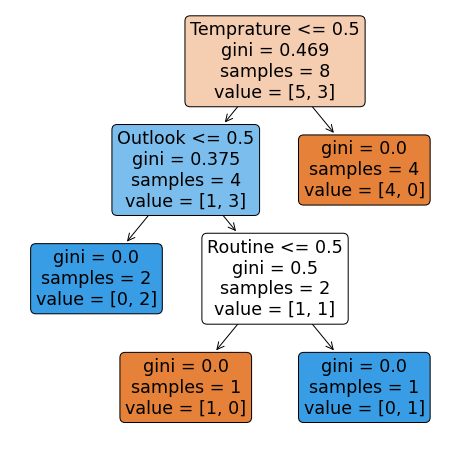

In [21]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
tree.plot_tree(dt, filled=True, rounded=True, feature_names=x.columns)

In [20]:
dt.predict([[1,0,0]]) #  Sunny, Cold , Indoor= ??

array(['No'], dtype=object)